In [1]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isna().sum() # this is a summation of null

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df.isna().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Gender          0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age', ylabel='Density'>

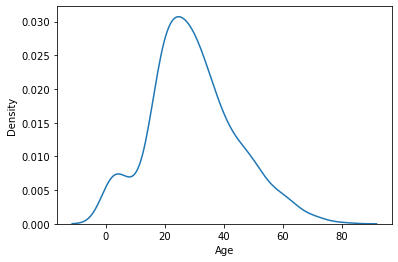

In [5]:
import seaborn as sns
sns.kdeplot(df["Age"])

In [6]:
df["Age"].mean()

29.69911764705882

<AxesSubplot:xlabel='Age2', ylabel='Density'>

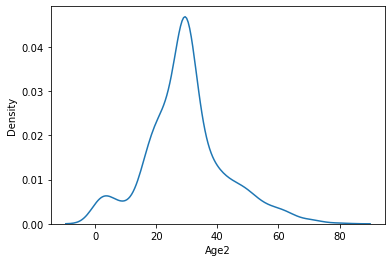

In [7]:
df["Age2"] = df["Age"].fillna(df["Age"].mean())
sns.kdeplot(df["Age2"])

In [16]:
import numpy as np
df = pd.DataFrame({"A":[40,20,30,42,np.nan,200,10,50,60],
                  "B":[10,12,13,14,15,16,14,15,13],
                  "C":[1,2,3,4,5,6,4,2,3]})
df

,A,B,C
0,40.0,10,1
1,20.0,12,2
2,30.0,13,3
3,42.0,14,4
4,NaN,15,5
5,200.0,16,6
6,10.0,14,4
7,50.0,15,2
8,60.0,13,3


In [17]:
df["A"].fillna(df["A"].mean())

0     40.0
1     20.0
2     30.0
3     42.0
4     56.5
5    200.0
6     10.0
7     50.0
8     60.0
Name: A, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
array = knn_imputer.fit_transform(df)
df1  = pd.DataFrame(array,columns=df.columns)
df1

,A,B,C
0,40.0,10.0,1.0
1,20.0,12.0,2.0
2,30.0,13.0,3.0
3,42.0,14.0,4.0
4,84.0,15.0,5.0
5,200.0,16.0,6.0
6,10.0,14.0,4.0
7,50.0,15.0,2.0
8,60.0,13.0,3.0


## NaN Euclidean Distance

In [22]:
df = pd.DataFrame({"A":[40,5,43,np.nan,41,48,52],
                  "B":[10,18,13,16,20,np.nan,15],
                   "C":[1,5,1,2,8,3,9]})
df

,A,B,C
0,40.0,10.0,1
1,5.0,18.0,5
2,43.0,13.0,1
3,NaN,16.0,2
4,41.0,20.0,8
5,48.0,NaN,3
6,52.0,15.0,9


In [ ]:
# d0 = np.sqrt(36+1)  # (10-16)^2 +(2-1)^2 =6.082   
d1 = np.sqrt(4+9) #(18-16)^2+(5-2)^2 =3.605
d2 = np.sqrt(9+1) # 3.162
# d3 # ignore
d4 = np.sqrt(16+36) #7.21110
d5 = np.sqrt(2*1) # (2/1*(2-3)^2) #1.414
d6 = np.sqrt(1+49) #7.071
d6

# sorting ascending order
# d5 = 48
# d2 = 43
# d1 = 5
np.mean(48+43+5) # 32

In [23]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
array = knn_imputer.fit_transform(df)
df1  = pd.DataFrame(array,columns=df.columns)
df1

,A,B,C
0,40.0,10.000000,1.0
1,5.0,18.000000,5.0
2,43.0,13.000000,1.0
3,32.0,16.000000,2.0
4,41.0,20.000000,8.0
5,48.0,14.666667,3.0
6,52.0,15.000000,9.0


In [ ]:
# 32.0
